# **NURI**

National Unified Climate Response and Disease Analysis With Prediction System


BY: DKK SMG

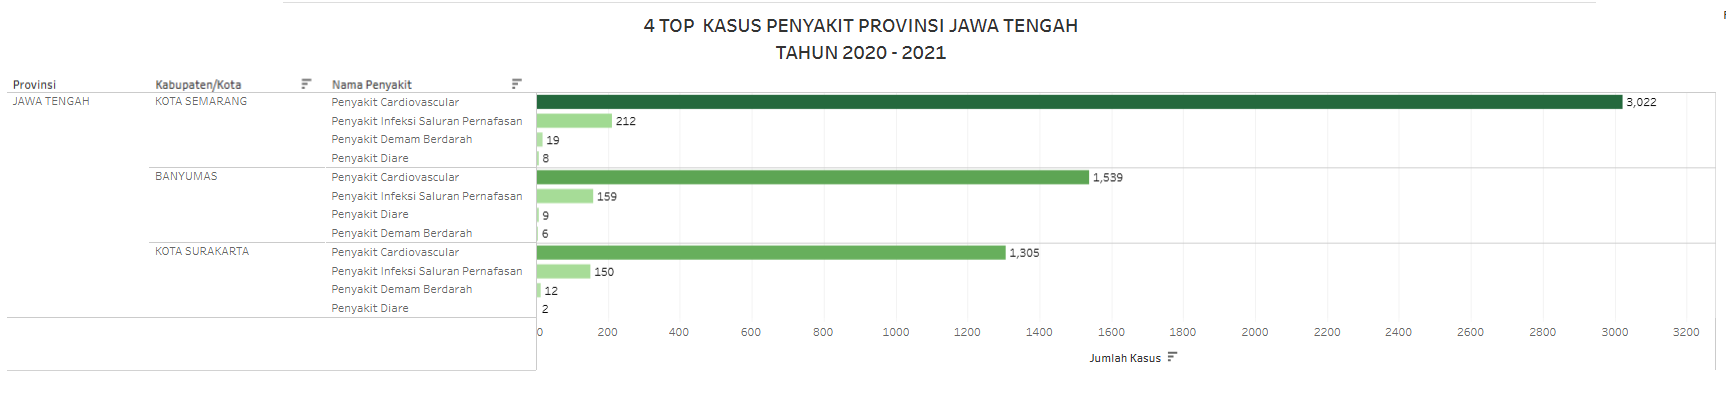

[link 4 top Kasus Penyakit di 3 Kota di Jawa Tengah 2020-2021](https://public.tableau.com/views/Book1jTOP3/Dashboard13?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

# Data Data collection

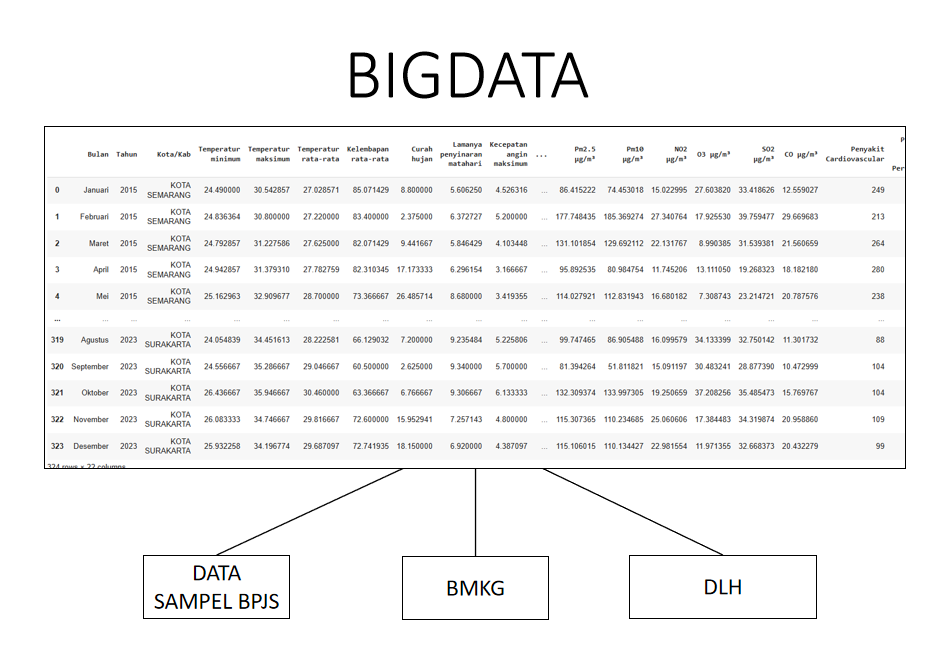

In [ ]:
import pandas as pd
import random

# Memuat data
df = pd.read_excel('/content/DATA3BMKG.xlsx')
df

,Bulan,Tahun,Kota/Kab,Temperatur minimum,Temperatur maksimum,Temperatur rata-rata,Kelembapan rata-rata,Curah hujan,Lamanya penyinaran matahari,Kecepatan angin maksimum,...,Pm2.5 µg/m³,Pm10 µg/m³,NO2 µg/m³,O3 µg/m³,SO2 µg/m³,CO µg/m³,Penyakit Cardiovascular,Penyakit Infeksi Saluran Pernafasan,Penyakit Demam Berdarah,Penyakit Diare
0,Januari,2015,KOTA SEMARANG,24.490000,30.542857,27.028571,85.071429,8.800000,5.606250,4.526316,...,86.415222,74.453018,15.022995,27.603820,33.418626,12.559027,249,14,3,1
1,Februari,2015,KOTA SEMARANG,24.836364,30.800000,27.220000,83.400000,2.375000,6.372727,5.200000,...,177.748435,185.369274,27.340764,17.925530,39.759477,29.669683,213,8,2,1
2,Maret,2015,KOTA SEMARANG,24.792857,31.227586,27.625000,82.071429,9.441667,5.846429,4.103448,...,131.101854,129.692112,22.131767,8.990385,31.539381,21.560659,264,17,0,1
3,April,2015,KOTA SEMARANG,24.942857,31.379310,27.782759,82.310345,17.173333,6.296154,3.166667,...,95.892535,80.984754,11.745206,13.111050,19.268323,18.182180,280,26,0,1
4,Mei,2015,KOTA SEMARANG,25.162963,32.909677,28.700000,73.366667,26.485714,8.680000,3.419355,...,114.027921,112.831943,16.680182,7.308743,23.214721,20.787576,238,18,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,Agustus,2023,KOTA SURAKARTA,24.054839,34.451613,28.222581,66.129032,7.200000,9.235484,5.225806,...,99.747465,86.905488,16.099579,34.133399,32.750142,11.301732,88,11,1,1
320,September,2023,KOTA SURAKARTA,24.556667,35.286667,29.046667,60.500000,2.625000,9.340000,5.700000,...,81.394264,51.811821,15.091197,30.483241,28.877390,10.472999,104,19,0,1
321,Oktober,2023,KOTA SURAKARTA,26.436667,35.946667,30.460000,63.366667,6.766667,9.306667,6.133333,...,132.309374,133.997305,19.250659,37.208256,35.485473,15.769767,104,19,1,0
322,November,2023,KOTA SURAKARTA,26.083333,34.746667,29.816667,72.600000,15.952941,7.257143,4.800000,...,115.307365,110.234685,25.060606,17.384483,34.319874,20.958860,109,15,1,1


In [ ]:
# Memeriksa info dasar tentang dataset
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Bulan                                324 non-null    object 
 1   Tahun                                324 non-null    int64  
 2   Kota/Kab                             324 non-null    object 
 3   Temperatur minimum                   324 non-null    float64
 4   Temperatur maksimum                  324 non-null    float64
 5   Temperatur rata-rata                 324 non-null    float64
 6   Kelembapan rata-rata                 324 non-null    float64
 7   Curah hujan                          324 non-null    float64
 8   Lamanya penyinaran matahari          324 non-null    float64
 9   Kecepatan angin maksimum             324 non-null    float64
 10  Arah angin saat kecepatan maksimum   324 non-null    float64
 11  Kecepatan angin rata-rata       

# Preprocessing Data

In [ ]:
# Mengubah kolom tanggal menjadi datetime
# Dictionary untuk menerjemahkan bulan dari bahasa Indonesia ke bahasa Inggris
bulan_translate = {
    'Januari': 'January', 'Februari': 'February', 'Maret': 'March', 'April': 'April',
    'Mei': 'May', 'Juni': 'June', 'Juli': 'July', 'Agustus': 'August',
    'September': 'September', 'Oktober': 'October', 'November': 'November', 'Desember': 'December'
}

# Mengganti nama bulan
df['Bulan_English'] = df['Bulan'].map(bulan_translate)
df['Bulan_Tahun'] = pd.to_datetime(df['Tahun'].astype(str) + '-' + df['Bulan_English'], format='%Y-%B')

# Melihat hasil
print(df[['Bulan', 'Bulan_English', 'Bulan_Tahun']])

         Bulan Bulan_English Bulan_Tahun
0      Januari       January  2015-01-01
1     Februari      February  2015-02-01
2        Maret         March  2015-03-01
3        April         April  2015-04-01
4          Mei           May  2015-05-01
..         ...           ...         ...
319    Agustus        August  2023-08-01
320  September     September  2023-09-01
321    Oktober       October  2023-10-01
322   November      November  2023-11-01
323   Desember      December  2023-12-01

[324 rows x 3 columns]


In [ ]:
# Menghapus kolom 'Bulan' dan 'Tahun'
df = df.drop(columns=['Bulan', 'Tahun', 'Bulan_English'])

In [ ]:
df

,Kota/Kab,Temperatur minimum,Temperatur maksimum,Temperatur rata-rata,Kelembapan rata-rata,Curah hujan,Lamanya penyinaran matahari,Kecepatan angin maksimum,Arah angin saat kecepatan maksimum,Kecepatan angin rata-rata,...,Pm10 µg/m³,NO2 µg/m³,O3 µg/m³,SO2 µg/m³,CO µg/m³,Penyakit Cardiovascular,Penyakit Infeksi Saluran Pernafasan,Penyakit Demam Berdarah,Penyakit Diare,Bulan_Tahun
0,KOTA SEMARANG,24.490000,30.542857,27.028571,85.071429,8.800000,5.606250,4.526316,318.421053,2.052632,...,74.453018,15.022995,27.603820,33.418626,12.559027,249,14,3,1,2015-01-01
1,KOTA SEMARANG,24.836364,30.800000,27.220000,83.400000,2.375000,6.372727,5.200000,324.500000,2.600000,...,185.369274,27.340764,17.925530,39.759477,29.669683,213,8,2,1,2015-02-01
2,KOTA SEMARANG,24.792857,31.227586,27.625000,82.071429,9.441667,5.846429,4.103448,311.896552,2.068966,...,129.692112,22.131767,8.990385,31.539381,21.560659,264,17,0,1,2015-03-01
3,KOTA SEMARANG,24.942857,31.379310,27.782759,82.310345,17.173333,6.296154,3.166667,293.000000,1.653846,...,80.984754,11.745206,13.111050,19.268323,18.182180,280,26,0,1,2015-04-01
4,KOTA SEMARANG,25.162963,32.909677,28.700000,73.366667,26.485714,8.680000,3.419355,133.870968,1.774194,...,112.831943,16.680182,7.308743,23.214721,20.787576,238,18,1,2,2015-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,KOTA SURAKARTA,24.054839,34.451613,28.222581,66.129032,7.200000,9.235484,5.225806,116.774193,2.322581,...,86.905488,16.099579,34.133399,32.750142,11.301732,88,11,1,1,2023-08-01
320,KOTA SURAKARTA,24.556667,35.286667,29.046667,60.500000,2.625000,9.340000,5.700000,148.333333,2.366667,...,51.811821,15.091197,30.483241,28.877390,10.472999,104,19,0,1,2023-09-01
321,KOTA SURAKARTA,26.436667,35.946667,30.460000,63.366667,6.766667,9.306667,6.133333,158.666667,2.433333,...,133.997305,19.250659,37.208256,35.485473,15.769767,104,19,1,0,2023-10-01
322,KOTA SURAKARTA,26.083333,34.746667,29.816667,72.600000,15.952941,7.257143,4.800000,151.000000,2.100000,...,110.234685,25.060606,17.384483,34.319874,20.958860,109,15,1,1,2023-11-01


In [ ]:
# Memeriksa apakah ada nilai yang hilang
print("Jumlah nilai yang hilang di setiap kolom:")
print(df.isnull().sum())

Jumlah nilai yang hilang di setiap kolom:
Kota/Kab                               0
Temperatur minimum                     0
Temperatur maksimum                    0
Temperatur rata-rata                   0
Kelembapan rata-rata                   0
Curah hujan                            0
Lamanya penyinaran matahari            0
Kecepatan angin maksimum               0
Arah angin saat kecepatan maksimum     0
Kecepatan angin rata-rata              0
Pm2.5 µg/m³                            0
Pm10 µg/m³                             0
NO2 µg/m³                              0
O3 µg/m³                               0
SO2 µg/m³                              0
CO µg/m³                               0
Penyakit Cardiovascular                0
Penyakit Infeksi Saluran Pernafasan    0
Penyakit Demam Berdarah                0
Penyakit Diare                         0
Bulan_Tahun                            0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np

# Mendefinisikan fungsi statistik deskriptif per kolom
def descriptive_stats(df, group_column, data_columns):
    stats = {}

    # Melakukan grup data berdasarkan kota/kabupaten
    grouped = df.groupby(group_column)

    for group, data in grouped:
        stats[group] = {}
        for col in data_columns:
            column_data = data[col].dropna()  # Hapus nilai NaN jika ada

            # Menghitung statistik yang diinginkan
            N = column_data.count()
            mean = column_data.mean()
            std_dev = column_data.std()
            minimum = column_data.min()
            maximum = column_data.max()
            q1 = column_data.quantile(0.25)
            median = column_data.median()
            q3 = column_data.quantile(0.75)

            stats[group][col] = {
                'N': N,
                'Mean ± SD': f"{mean:.2f} ± {std_dev:.2f}",
                'Min': minimum,
                'Max': maximum,
                'Q1': q1,
                'Median': median,
                'Q3': q3
            }

    return stats

# Kolom yang ingin dihitung statistik deskriptifnya
data_columns = [
    'Temperatur minimum', 'Temperatur maksimum', 'Temperatur rata-rata', 'Kelembapan rata-rata',
    'Curah hujan', 'Lamanya penyinaran matahari', 'Kecepatan angin maksimum',
    'Pm2.5 µg/m³', 'Pm10 µg/m³', 'NO2 µg/m³', 'O3 µg/m³', 'SO2 µg/m³', 'CO µg/m³',
    'Penyakit Cardiovascular', 'Penyakit Infeksi Saluran Pernafasan',
    'Penyakit Demam Berdarah', 'Penyakit Diare'
]

# Menjalankan fungsi statistik deskriptif pada data
stats = descriptive_stats(df, group_column='Kota/Kab', data_columns=data_columns)

# Menampilkan hasil
for kota, kota_stats in stats.items():
    print(f"\nStatistik deskriptif untuk {kota}:")
    kota_stats_df = pd.DataFrame(kota_stats).T  # Konversi ke DataFrame untuk tampilan yang lebih rapi
    print(kota_stats_df)



Statistik deskriptif untuk BANYUMAS:
                                       N       Mean ± SD        Min  \
Temperatur minimum                   108    24.76 ± 0.63       23.0   
Temperatur maksimum                  108    32.77 ± 1.38  30.169231   
Temperatur rata-rata                 108    28.31 ± 0.75  26.653571   
Kelembapan rata-rata                 108    73.49 ± 7.11  55.096774   
Curah hujan                          108    12.52 ± 7.17        0.0   
Lamanya penyinaran matahari          108     7.42 ± 1.87        3.3   
Kecepatan angin maksimum             108     6.24 ± 0.74       4.25   
Pm2.5 µg/m³                          108  128.32 ± 29.51  67.353148   
Pm10 µg/m³                           108  125.45 ± 39.63  45.991917   
NO2 µg/m³                            108    20.46 ± 4.27   9.795052   
O3 µg/m³                             108    16.23 ± 6.51   4.927375   
SO2 µg/m³                            108    32.17 ± 6.80  11.661398   
CO µg/m³                             10

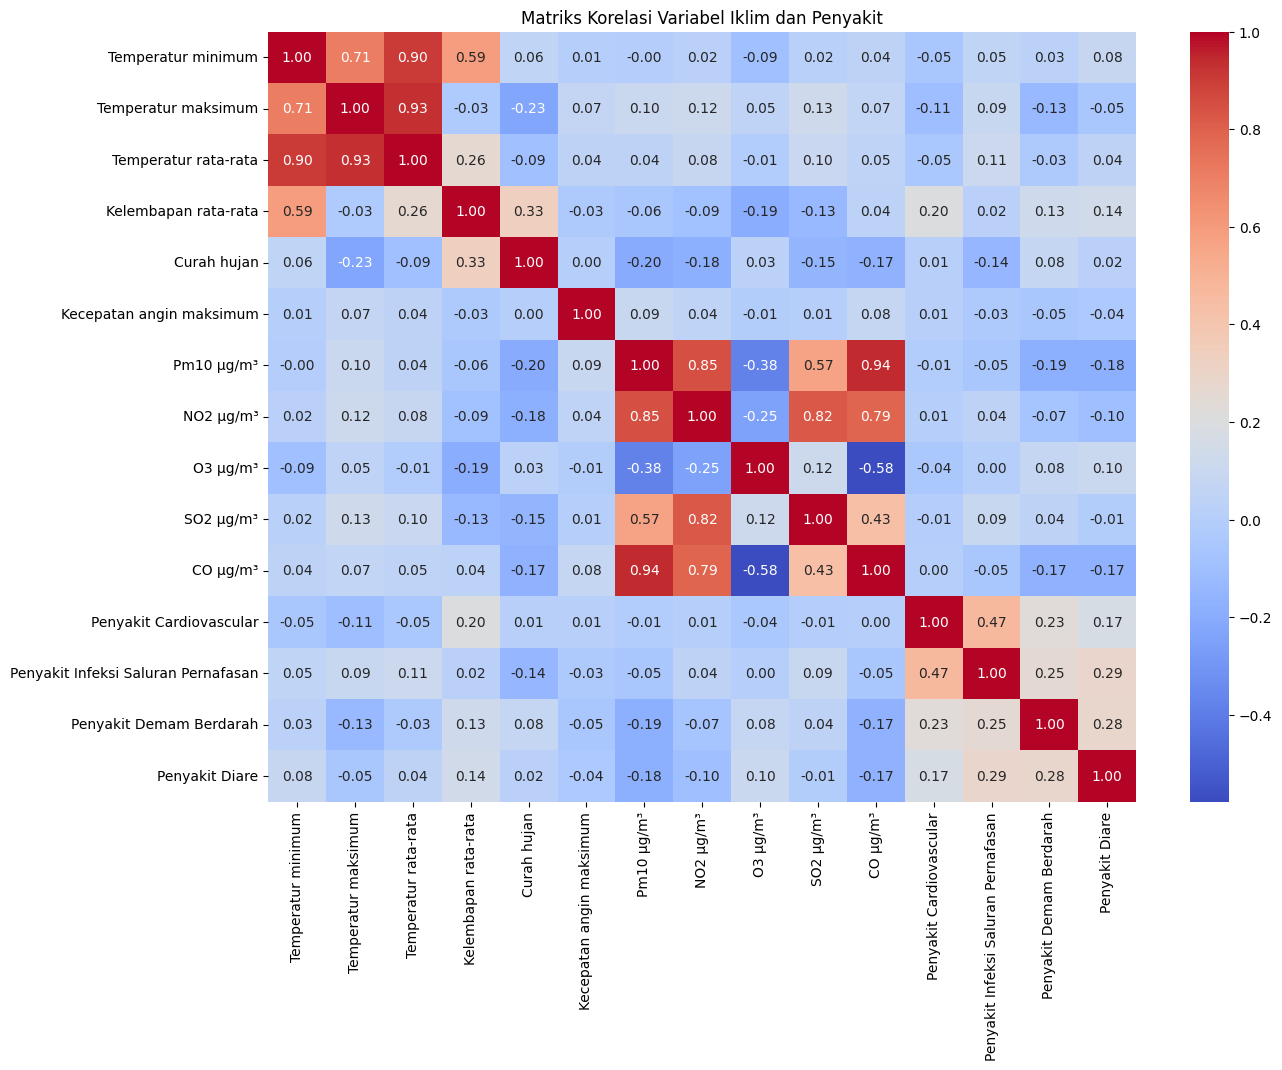

Regulasi untuk Penyakit Cardiovascular:
                               OLS Regression Results                              
Dep. Variable:     Penyakit Cardiovascular   R-squared:                       0.296
Model:                                 OLS   Adj. R-squared:                  0.271
Method:                      Least Squares   F-statistic:                     11.93
Date:                     Sun, 03 Nov 2024   Prob (F-statistic):           1.13e-18
Time:                             12:21:12   Log-Likelihood:                -1761.6
No. Observations:                      324   AIC:                             3547.
Df Residuals:                          312   BIC:                             3593.
Df Model:                               11                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

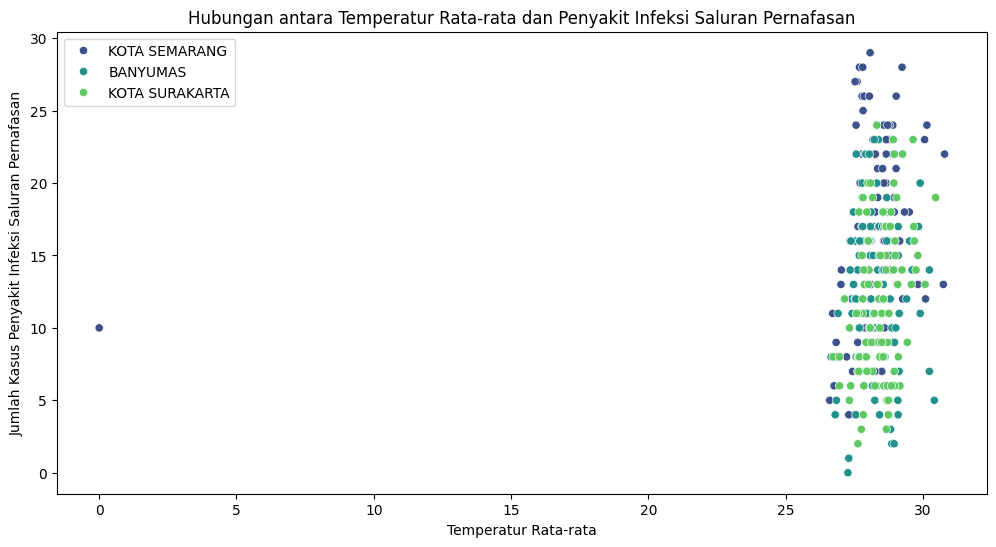

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


# 1. Persiapan Data: Memastikan tidak ada nilai null
df = df.dropna()

# 2. Pilih kolom yang relevan untuk uji korelasi
selected_columns = [
    'Temperatur minimum',
    'Temperatur maksimum',
    'Temperatur rata-rata',
    'Kelembapan rata-rata',
    'Curah hujan',
    'Kecepatan angin maksimum',
    'Pm10 µg/m³',
    'NO2 µg/m³',
    'O3 µg/m³',
    'SO2 µg/m³',
    'CO µg/m³',
    'Penyakit Cardiovascular',
    'Penyakit Infeksi Saluran Pernafasan',
    'Penyakit Demam Berdarah',
    'Penyakit Diare'
]

# 3. Korelasi antar variabel yang dipilih
correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi Variabel Iklim dan Penyakit')
plt.show()

# 4. Regresi Linier untuk masing-masing penyakit
for disease in ['Penyakit Cardiovascular', 'Penyakit Infeksi Saluran Pernafasan', 'Penyakit Demam Berdarah', 'Penyakit Diare']:
    print(f'Regulasi untuk {disease}:')

    # Mengatur variabel independen dan dependen
    X = df[['Temperatur minimum', 'Temperatur maksimum', 'Temperatur rata-rata',
             'Kelembapan rata-rata', 'Curah hujan', 'Kecepatan angin maksimum',
             'Pm10 µg/m³', 'NO2 µg/m³', 'O3 µg/m³', 'SO2 µg/m³', 'CO µg/m³']]

    y = df[disease]

    # Menambahkan konstanta untuk regresi
    X = sm.add_constant(X)

    # Membuat model regresi
    model = sm.OLS(y, X).fit()

    # Menampilkan ringkasan hasil regresi
    print(model.summary())
    print('\n' + '-'*80 + '\n')

# 5. Visualisasi: Visualisasi hubungan antar variabel dengan  penyakit
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Temperatur rata-rata', y='Penyakit Infeksi Saluran Pernafasan', hue='Kota/Kab', palette='viridis')
plt.title('Hubungan antara Temperatur Rata-rata dan Penyakit Infeksi Saluran Pernafasan')
plt.xlabel('Temperatur Rata-rata')
plt.ylabel('Jumlah Kasus Penyakit Infeksi Saluran Pernafasan')
plt.legend()
plt.show()


 K-Means Clustering untuk Prediksi Penyakit di Tahun 2024

**DBSCAN dan Agglomerative Clustering untuk clustering data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score


Normalisasi Data

In [ ]:
# Misalkan kita mengambil beberapa fitur yang relevan untuk clustering
features = df[['Temperatur minimum', 'Temperatur maksimum', 'Temperatur rata-rata', 'Kelembapan rata-rata',
                'Curah hujan', 'Kecepatan angin maksimum', 'Pm10 µg/m³',
                'NO2 µg/m³', 'O3 µg/m³', 'SO2 µg/m³', 'CO µg/m³',
                'Penyakit Cardiovascular', 'Penyakit Infeksi Saluran Pernafasan',
                'Penyakit Demam Berdarah', 'Penyakit Diare']]

# Normalisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


DBSCAN

In [ ]:
# Menggunakan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_scaled)

# Hitung Silhouette Score
if len(set(dbscan_labels)) > 1:  # Pastikan ada lebih dari 1 cluster
    dbscan_silhouette = silhouette_score(features_scaled, dbscan_labels)
else:
    dbscan_silhouette = -1  # Nilai negatif jika hanya satu cluster

print(f"Hasil Silhouette Score untuk DBSCAN: {dbscan_silhouette}")


Hasil Silhouette Score untuk DBSCAN: -1


In [ ]:
#Agglomerative Clustering
# Menggunakan Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(features_scaled)

# Hitung Silhouette Score
agglo_silhouette = silhouette_score(features_scaled, agglo_labels)

print(f"Hasil Silhouette Score untuk Agglomerative Clustering: {agglo_silhouette}")


Hasil Silhouette Score untuk Agglomerative Clustering: 0.18997881380722784


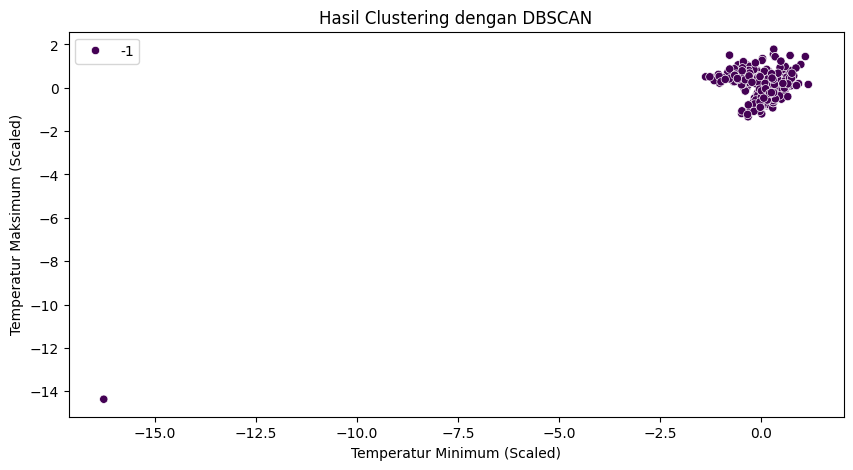

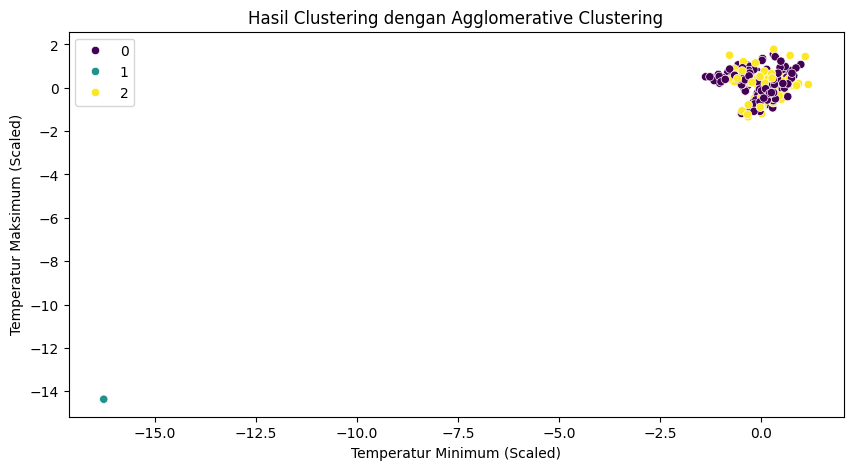

In [ ]:
# Visualisasi untuk DBSCAN
plt.figure(figsize=(10, 5))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('Hasil Clustering dengan DBSCAN')
plt.xlabel('Temperatur Minimum (Scaled)')
plt.ylabel('Temperatur Maksimum (Scaled)')
plt.legend()
plt.show()

# Visualisasi untuk Agglomerative Clustering
plt.figure(figsize=(10, 5))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=agglo_labels, palette='viridis')
plt.title('Hasil Clustering dengan Agglomerative Clustering')
plt.xlabel('Temperatur Minimum (Scaled)')
plt.ylabel('Temperatur Maksimum (Scaled)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np


# Mengelompokkan data berdasarkan kota dan bulan
historical_data = df[df['Bulan_Tahun'].dt.month == 11]  # Mengambil hanya bulan November
historical_data['Year'] = historical_data['Bulan_Tahun'].dt.year  # Tambahkan kolom tahun

# Mempersiapkan data untuk setiap kota
cities = historical_data['Kota/Kab'].unique()
predictions = []

for city in cities:
    city_data = historical_data[historical_data['Kota/Kab'] == city]

    # Mengambil data untuk prediksi (Kasus Penyakit)
    cases = city_data[['Penyakit Infeksi Saluran Pernafasan',
                       'Penyakit Demam Berdarah',
                       'Penyakit Cardiovascular',
                       'Penyakit Diare']]

    # Membuat variabel untuk model
    years = city_data['Year'].values.reshape(-1, 1)

    # Melakukan prediksi untuk setiap jenis penyakit
    for case in cases.columns:
        model = LinearRegression()
        model.fit(years, cases[case].values)

        # Prediksi untuk tahun 2024
        predicted_cases = model.predict(np.array([[2024]]))

        predictions.append({
            'Kota/Kab': city,
            'Penyakit': case,
            'Prediksi Kasus November 2024': predicted_cases[0]
        })

# Mengonversi hasil prediksi ke DataFrame
predictions_df = pd.DataFrame(predictions)

# Menampilkan hasil prediksi
print(predictions_df)


          Kota/Kab                             Penyakit  \
0    KOTA SEMARANG  Penyakit Infeksi Saluran Pernafasan   
1    KOTA SEMARANG              Penyakit Demam Berdarah   
2    KOTA SEMARANG              Penyakit Cardiovascular   
3    KOTA SEMARANG                       Penyakit Diare   
4         BANYUMAS  Penyakit Infeksi Saluran Pernafasan   
5         BANYUMAS              Penyakit Demam Berdarah   
6         BANYUMAS              Penyakit Cardiovascular   
7         BANYUMAS                       Penyakit Diare   
8   KOTA SURAKARTA  Penyakit Infeksi Saluran Pernafasan   
9   KOTA SURAKARTA              Penyakit Demam Berdarah   
10  KOTA SURAKARTA              Penyakit Cardiovascular   
11  KOTA SURAKARTA                       Penyakit Diare   

    Prediksi Kasus November 2024  
0                      26.694444  
1                       4.000000  
2                     271.833333  
3                       1.611111  
4                      15.861111  
5                     

<ipython-input-16-df6792754d3c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_data['Year'] = historical_data['Bulan_Tahun'].dt.year  # Tambahkan kolom tahun


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Misalkan df adalah DataFrame yang berisi data historis
# df = pd.read_csv('data_historis.csv')

# Mengelompokkan data berdasarkan kota dan bulan
historical_data = df[df['Bulan_Tahun'].dt.month == 11]  # Mengambil hanya bulan November
historical_data['Year'] = historical_data['Bulan_Tahun'].dt.year  # Tambahkan kolom tahun

# Mempersiapkan data untuk setiap kota
cities = historical_data['Kota/Kab'].unique()
environmental_predictions = []

# Daftar variabel yang akan diprediksi
environmental_variables = [
    'Temperatur minimum',
    'Temperatur maksimum',
    'Temperatur rata-rata',
    'Kelembapan rata-rata',
    'Curah hujan',
    'Kecepatan angin maksimum',
    'Pm10 µg/m³',
    'NO2 µg/m³',
    'O3 µg/m³',
    'SO2 µg/m³',
    'CO µg/m³',
    'Penyakit Infeksi Saluran Pernafasan',
    'Penyakit Demam Berdarah',
    'Penyakit Cardiovascular',
    'Penyakit Diare'
]

for city in cities:
    city_data = historical_data[historical_data['Kota/Kab'] == city]

    # Membuat variabel untuk model
    years = city_data['Year'].values.reshape(-1, 1)

    # Melakukan prediksi untuk setiap variabel lingkungan
    for var in environmental_variables:
        model = LinearRegression()
        model.fit(years, city_data[var].values)

        # Prediksi untuk tahun 2024
        predicted_value = model.predict(np.array([[2024]]))

        environmental_predictions.append({
            'Kota/Kab': city,
            'Variabel': var,
            'Prediksi November 2024': predicted_value[0]
        })

# Mengonversi hasil prediksi ke DataFrame
environmental_predictions_df = pd.DataFrame(environmental_predictions)

# Menyimpan hasil prediksi ke file Excel
output_file = 'prediksi_november_2024.xlsx'
environmental_predictions_df.to_excel(output_file, index=False)

# Menampilkan hasil prediksi
print(environmental_predictions_df)


          Kota/Kab                             Variabel  \
0    KOTA SEMARANG                   Temperatur minimum   
1    KOTA SEMARANG                  Temperatur maksimum   
2    KOTA SEMARANG                 Temperatur rata-rata   
3    KOTA SEMARANG                 Kelembapan rata-rata   
4    KOTA SEMARANG                          Curah hujan   
5    KOTA SEMARANG             Kecepatan angin maksimum   
6    KOTA SEMARANG                           Pm10 µg/m³   
7    KOTA SEMARANG                            NO2 µg/m³   
8    KOTA SEMARANG                             O3 µg/m³   
9    KOTA SEMARANG                            SO2 µg/m³   
10   KOTA SEMARANG                             CO µg/m³   
11   KOTA SEMARANG  Penyakit Infeksi Saluran Pernafasan   
12   KOTA SEMARANG              Penyakit Demam Berdarah   
13   KOTA SEMARANG              Penyakit Cardiovascular   
14   KOTA SEMARANG                       Penyakit Diare   
15        BANYUMAS                   Temperatur minimum 

<ipython-input-17-dc0389ed24b9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_data['Year'] = historical_data['Bulan_Tahun'].dt.year  # Tambahkan kolom tahun


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Misalkan df adalah DataFrame yang berisi data historis
# df = pd.read_csv('data_historis.csv')

# Mengelompokkan data berdasarkan kota dan bulan
historical_data = df[df['Bulan_Tahun'].dt.month == 11].copy()  # Mengambil hanya bulan November dan membuat salinan
historical_data.loc[:, 'Year'] = historical_data['Bulan_Tahun'].dt.year  # Tambahkan kolom tahun

# Mempersiapkan data untuk setiap kota
cities = historical_data['Kota/Kab'].unique()
environmental_predictions = []

# Daftar variabel yang akan diprediksi
environmental_variables = [
    'Temperatur minimum',
    'Temperatur maksimum',
    'Temperatur rata-rata',
    'Kelembapan rata-rata',
    'Curah hujan',
    'Kecepatan angin maksimum',
    'Pm10 µg/m³',
    'NO2 µg/m³',
    'O3 µg/m³',
    'SO2 µg/m³',
    'CO µg/m³',
    'Penyakit Infeksi Saluran Pernafasan',
    'Penyakit Demam Berdarah',
    'Penyakit Cardiovascular',
    'Penyakit Diare'
]

# Fungsi untuk membuat pesan peringatan
def generate_warning_message(cluster):
    if cluster == 'Low Risk':
        return ("Peringatan Risiko Rendah: Tetap jaga kebersihan dan kesehatan. "
                "Lakukan pemeriksaan kesehatan berkala untuk pencegahan dini.\n")
    elif cluster == 'Medium Risk':
        return ("Peringatan Risiko Sedang: Ada peningkatan risiko ISPA dan DBD. "
                "Hindari polusi dengan menggunakan masker dan perhatikan lingkungan sekitar agar bebas dari genangan air.\n")
    elif cluster == 'High Risk':
        return ("Peringatan Risiko Tinggi: Peningkatan risiko ISPA, DBD, dan Penyakit Kardiovaskular. "
                "Kurangi aktivitas luar ruangan, gunakan masker N95, perhatikan kebersihan lingkungan untuk mencegah DBD, "
                "dan masyarakat dengan riwayat penyakit jantung disarankan untuk memantau kesehatan secara rutin.\n")
    else:
        return "Data tidak valid"

# Fungsi untuk menentukan cluster risiko berdasarkan nilai
def determine_cluster(variable, predicted_value):
    if variable in ['Temperatur minimum', 'Temperatur maksimum', 'Temperatur rata-rata']:
        if predicted_value < 15:  #threshold untuk low risk
            return 'Low Risk'
        elif 15 <= predicted_value < 25:  # Threshold untuk medium risk
            return 'Medium Risk'
        else:
            return 'High Risk'
    elif variable in ['Kelembapan rata-rata', 'Curah hujan']:
        if predicted_value < 60:
            return 'Low Risk'
        elif 60 <= predicted_value < 80:
            return 'Medium Risk'
        else:
            return 'High Risk'
    elif variable in ['Kecepatan angin maksimum', 'Pm10 µg/m³', 'NO2 µg/m³', 'O3 µg/m³', 'SO2 µg/m³', 'CO µg/m³']:
        if predicted_value < 50:
            return 'Low Risk'
        elif 50 <= predicted_value < 100:
            return 'Medium Risk'
        else:
            return 'High Risk'
    elif variable in ['Penyakit Infeksi Saluran Pernafasan', 'Penyakit Demam Berdarah', 'Penyakit Cardiovascular', 'Penyakit Diare']:
        if predicted_value < 10:  # Misalnya threshold untuk low risk
            return 'Low Risk'
        elif 10 <= predicted_value < 20:  # Threshold untuk medium risk
            return 'Medium Risk'
        else:
            return 'High Risk'
    return 'Unknown'

# Fungsi untuk mengevaluasi akurasi model clustering
def evaluate_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    print(f'Silhouette Score untuk {n_clusters} clusters: {silhouette_avg}')

for city in cities:
    city_data = historical_data[historical_data['Kota/Kab'] == city]

    # Membuat variabel untuk model
    years = city_data['Year'].values.reshape(-1, 1)

    # Melakukan prediksi untuk setiap variabel lingkungan
    for var in environmental_variables:
        model = LinearRegression()
        model.fit(years, city_data[var].values)

        # Prediksi untuk tahun 2024
        predicted_value = model.predict(np.array([[2024]]))

        # Tentukan cluster risiko berdasarkan prediksi
        cluster = determine_cluster(var, predicted_value[0])

        # Menghasilkan pesan peringatan
        warning_message = generate_warning_message(cluster)

        environmental_predictions.append({
            'Kota/Kab': city,
            'Variabel': var,
            'Prediksi November 2024': predicted_value[0],
            'Pesan Peringatan': warning_message
        })

# Mengonversi hasil prediksi ke DataFrame
environmental_predictions_df = pd.DataFrame(environmental_predictions)

# Evaluasi clustering menggunakan beberapa fitur (contoh: 'Temperatur maksimum', 'Kelembapan rata-rata')
data_for_clustering = city_data[['Temperatur maksimum', 'Kelembapan rata-rata']]
evaluate_clustering(data_for_clustering, n_clusters=3)

# Simulasi mengirim pesan peringatan
def send_warning_message(city, variable, message):
    # Simulasi pengiriman pesan, misalnya melalui SMS atau aplikasi
    print(f"Pengiriman pesan ke {city} untuk {variable}: {message}")

# Mengirim pesan peringatan untuk bulan November 2024
for index, row in environmental_predictions_df.iterrows():
    send_warning_message(row['Kota/Kab'], row['Variabel'], row['Pesan Peringatan'])

# Menyimpan hasil prediksi ke file Excel
output_file = 'prediksi_november_2024.xlsx'
environmental_predictions_df.to_excel(output_file, index=False)

# Menampilkan hasil prediksi
print(environmental_predictions_df)


Silhouette Score untuk 3 clusters: 0.6818761131929647
Pengiriman pesan ke KOTA SEMARANG untuk Temperatur minimum: Peringatan Risiko Tinggi: Peningkatan risiko ISPA, DBD, dan Penyakit Kardiovaskular. Kurangi aktivitas luar ruangan, gunakan masker N95, perhatikan kebersihan lingkungan untuk mencegah DBD, dan masyarakat dengan riwayat penyakit jantung disarankan untuk memantau kesehatan secara rutin.

Pengiriman pesan ke KOTA SEMARANG untuk Temperatur maksimum: Peringatan Risiko Tinggi: Peningkatan risiko ISPA, DBD, dan Penyakit Kardiovaskular. Kurangi aktivitas luar ruangan, gunakan masker N95, perhatikan kebersihan lingkungan untuk mencegah DBD, dan masyarakat dengan riwayat penyakit jantung disarankan untuk memantau kesehatan secara rutin.

Pengiriman pesan ke KOTA SEMARANG untuk Temperatur rata-rata: Peringatan Risiko Tinggi: Peningkatan risiko ISPA, DBD, dan Penyakit Kardiovaskular. Kurangi aktivitas luar ruangan, gunakan masker N95, perhatikan kebersihan lingkungan untuk mencegah DB

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Misalkan df adalah DataFrame yang berisi data historis
# df = pd.read_csv('data_historis.csv')

# Mengelompokkan data berdasarkan kota dan bulan
historical_data = df[df['Bulan_Tahun'].dt.month == 11].copy()  # Mengambil hanya bulan November dan membuat salinan
historical_data['Year'] = historical_data['Bulan_Tahun'].dt.year  # Tambahkan kolom tahun

# Mempersiapkan data untuk setiap kota
cities = historical_data['Kota/Kab'].unique()
environmental_predictions = []

# Daftar variabel yang akan diprediksi
environmental_variables = [
    'Temperatur minimum',
    'Temperatur maksimum',
    'Temperatur rata-rata',
    'Kelembapan rata-rata',
    'Curah hujan',
    'Kecepatan angin maksimum',
    'Pm10 µg/m³',
    'NO2 µg/m³',
    'O3 µg/m³',
    'SO2 µg/m³',
    'CO µg/m³',
    'Penyakit Infeksi Saluran Pernafasan',
    'Penyakit Demam Berdarah',
    'Penyakit Cardiovascular',
    'Penyakit Diare'
]

# Fungsi untuk membuat rangkuman informasi prediksi
def summarize_information(city, predictions):
    summary = f"**Rangkuman Prediksi untuk {city} - November 2024**\n"
    summary += "-----------------------------------\n"
    for prediction in predictions:
        summary += f"- **{prediction['Variabel']}:** {prediction['Prediksi November 2024']}\n"
        summary += f"  *Pesan Peringatan:* {prediction['Pesan Peringatan']}\n"
    summary += "-----------------------------------\n"
    return summary

# Fungsi untuk mensimulasikan pengiriman pesan melalui WhatsApp
def send_whatsapp_message(city, message):
    # Simulasi pengiriman pesan, misalnya melalui WhatsApp
    print(f"Pengiriman pesan WA ke {city}:\n{message}")

# Mengumpulkan informasi untuk setiap kota
for city in cities:
    city_data = historical_data[historical_data['Kota/Kab'] == city]

    # Membuat variabel untuk model
    years = city_data['Year'].values.reshape(-1, 1)

    # Melakukan prediksi untuk setiap variabel lingkungan
    predictions = []
    for var in environmental_variables:
        model = LinearRegression()
        model.fit(years, city_data[var].values)

        # Prediksi untuk tahun 2024
        predicted_value = model.predict(np.array([[2024]]))

        # Tentukan cluster risiko berdasarkan prediksi
        cluster = determine_cluster(var, predicted_value[0])

        # Menghasilkan pesan peringatan
        warning_message = generate_warning_message(cluster)

        predictions.append({
            'Kota/Kab': city,
            'Variabel': var,
            'Prediksi November 2024': predicted_value[0],
            'Pesan Peringatan': warning_message
        })

    # Membuat rangkuman untuk setiap kota
    summary_message = summarize_information(city, predictions)

    # Mengirim pesan rangkuman melalui WhatsApp
    send_whatsapp_message(city, summary_message)

# Menyimpan hasil prediksi ke file Excel (jika perlu)
output_file = 'prediksi_november_2024_rangkuman.xlsx'
pd.DataFrame(predictions).to_excel(output_file, index=False)


Pengiriman pesan WA ke KOTA SEMARANG:
**Rangkuman Prediksi untuk KOTA SEMARANG - November 2024**
-----------------------------------
- **Temperatur minimum:** 25.155384612777773
  *Pesan Peringatan:* Peringatan Risiko Tinggi: Peningkatan risiko ISPA, DBD, dan Penyakit Kardiovaskular. Kurangi aktivitas luar ruangan, gunakan masker N95, perhatikan kebersihan lingkungan untuk mencegah DBD, dan masyarakat dengan riwayat penyakit jantung disarankan untuk memantau kesehatan secara rutin.

- **Temperatur maksimum:** 33.069017095277786
  *Pesan Peringatan:* Peringatan Risiko Tinggi: Peningkatan risiko ISPA, DBD, dan Penyakit Kardiovaskular. Kurangi aktivitas luar ruangan, gunakan masker N95, perhatikan kebersihan lingkungan untuk mencegah DBD, dan masyarakat dengan riwayat penyakit jantung disarankan untuk memantau kesehatan secara rutin.

- **Temperatur rata-rata:** 29.261658456111093
  *Pesan Peringatan:* Peringatan Risiko Tinggi: Peningkatan risiko ISPA, DBD, dan Penyakit Kardiovaskular. Ku

In [ ]:
!pip install flask
!pip install pyngrok


In [ ]:
import requests
import json
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# API Key dan Daftar Nomor Tujuan
API_KEY = 'Q1OTKLXL7XX#####'  # API key Anda
NUMBER_KEY = 'FlLf4NX5aH#####'  # Number key Anda
WA_NUMBERS = ['0822272####', '0898356####', '08950484####']  # Daftar nomor tujuan
WATZAP_URL = 'https://api.watzap.id/v1/send_message'  # URL API

# Fungsi untuk mengirim pesan ke WhatsApp
def send_whatsapp_message(city, message):
    headers = {'Content-Type': 'application/json'}
    for number in WA_NUMBERS:
        payload = json.dumps({
            "api_key": API_KEY,
            "number_key": NUMBER_KEY,
            "phone_no": number,
            "message": message
        })
        response = requests.post(WATZAP_URL, headers=headers, data=payload)
        print(f"Pengiriman pesan WA ke {number} ({city}):\n{message}")
        print("Response:", response.json())

# Fungsi untuk membuat rangkuman informasi prediksi
def summarize_information(city, predictions):
    summary = f"Rangkuman Prediksi untuk {city} - November 2024\n"
    summary += "-----------------------------------\n"
    for prediction in predictions:
        summary += f"- {prediction['Variabel']}: {prediction['Prediksi November 2024']:.2f}\n"
        summary += f"  Pesan Peringatan: {prediction['Pesan Peringatan']}\n\n"  # Tambah baris kosong setelah setiap pesan peringatan
    summary += "-----------------------------------\n\n"
    summary += "_Pesan ini dikirimkan otomatis oleh NURI._\n"
    summary += "_*Jangan membalas pesan ini*_\n"
    return summary

# Fungsi untuk menentukan cluster risiko berdasarkan nilai prediksi
def determine_cluster(variable, value):
    if value > 100:
        return "Risiko Tinggi"
    elif value > 50:
        return "Risiko Sedang"
    else:
        return "Risiko Rendah"

# Fungsi untuk menghasilkan pesan peringatan berdasarkan cluster
def generate_warning_message(cluster):
    if cluster == "Risiko Tinggi":
        return "Peningkatan risiko ISPA, DBD, dan Penyakit Kardiovaskular. Kurangi aktivitas luar ruangan, gunakan masker N95, dan perhatikan kebersihan lingkungan."
    elif cluster == "Risiko Sedang":
        return "Ada peningkatan risiko ISPA dan DBD. Hindari polusi dengan menggunakan masker."
    else:
        return "Tetap jaga kebersihan dan kesehatan. Lakukan pemeriksaan kesehatan berkala untuk pencegahan dini."

# Daftar variabel yang akan diprediksi
environmental_variables = [
    'Temperatur minimum', 'Temperatur maksimum', 'Temperatur rata-rata',
    'Kelembapan rata-rata', 'Curah hujan', 'Kecepatan angin maksimum',
    'Pm10 µg/m³', 'NO2 µg/m³', 'O3 µg/m³', 'SO2 µg/m³', 'CO µg/m³',
    'Penyakit Infeksi Saluran Pernafasan', 'Penyakit Demam Berdarah',
    'Penyakit Cardiovascular', 'Penyakit Diare'
]

# Simulasi data historis (misalkan df sudah terisi)
# df = pd.read_csv('data_historis.csv')
# df['Bulan_Tahun'] = pd.to_datetime(df['Bulan_Tahun'])

# Mengelompokkan data berdasarkan kota dan bulan
historical_data = df[df['Bulan_Tahun'].dt.month == 11].copy()  # Hanya bulan November
historical_data['Year'] = historical_data['Bulan_Tahun'].dt.year  # Tambahkan kolom tahun

# Mengumpulkan informasi dan melakukan pengiriman pesan untuk setiap kota
cities = historical_data['Kota/Kab'].unique()
for city in cities:
    city_data = historical_data[historical_data['Kota/Kab'] == city]
    years = city_data['Year'].values.reshape(-1, 1)

    predictions = []
    for var in environmental_variables:
        model = LinearRegression()
        model.fit(years, city_data[var].values)

        # Prediksi untuk tahun 2024
        predicted_value = model.predict(np.array([[2024]]))
        cluster = determine_cluster(var, predicted_value[0])
        warning_message = generate_warning_message(cluster)

        predictions.append({
            'Kota/Kab': city,
            'Variabel': var,
            'Prediksi November 2024': predicted_value[0],
            'Pesan Peringatan': warning_message
        })

    # Membuat rangkuman pesan dan mengirim ke WhatsApp
    summary_message = summarize_information(city, predictions)
    send_whatsapp_message(city, summary_message)

# Menyimpan hasil prediksi ke file Excel (jika diperlukan)
output_file = 'prediksi_november_2024_rangkuman.xlsx'
pd.DataFrame(predictions).to_excel(output_file, index=False)


Pengiriman pesan WA ke 082227250034 (KOTA SEMARANG):
Rangkuman Prediksi untuk KOTA SEMARANG - November 2024
-----------------------------------
- Temperatur minimum: 25.16
  Pesan Peringatan: Tetap jaga kebersihan dan kesehatan. Lakukan pemeriksaan kesehatan berkala untuk pencegahan dini.

- Temperatur maksimum: 33.07
  Pesan Peringatan: Tetap jaga kebersihan dan kesehatan. Lakukan pemeriksaan kesehatan berkala untuk pencegahan dini.

- Temperatur rata-rata: 29.26
  Pesan Peringatan: Tetap jaga kebersihan dan kesehatan. Lakukan pemeriksaan kesehatan berkala untuk pencegahan dini.

- Kelembapan rata-rata: 78.31
  Pesan Peringatan: Ada peningkatan risiko ISPA dan DBD. Hindari polusi dengan menggunakan masker.

- Curah hujan: 13.19
  Pesan Peringatan: Tetap jaga kebersihan dan kesehatan. Lakukan pemeriksaan kesehatan berkala untuk pencegahan dini.

- Kecepatan angin maksimum: 5.27
  Pesan Peringatan: Tetap jaga kebersihan dan kesehatan. Lakukan pemeriksaan kesehatan berkala untuk pencegah